In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [10]:
import pandas as pd  # Make sure this line runs first

df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [12]:
# Check the shape and data types
df.info()

# Get summary statistics
df.describe()

# Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

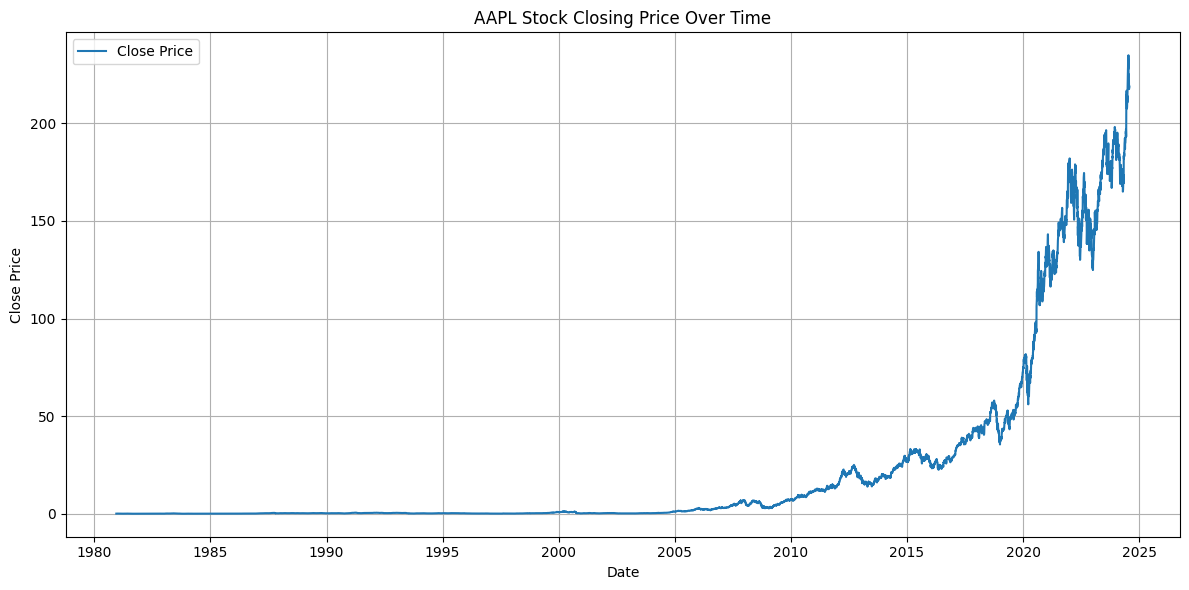

In [13]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('AAPL Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


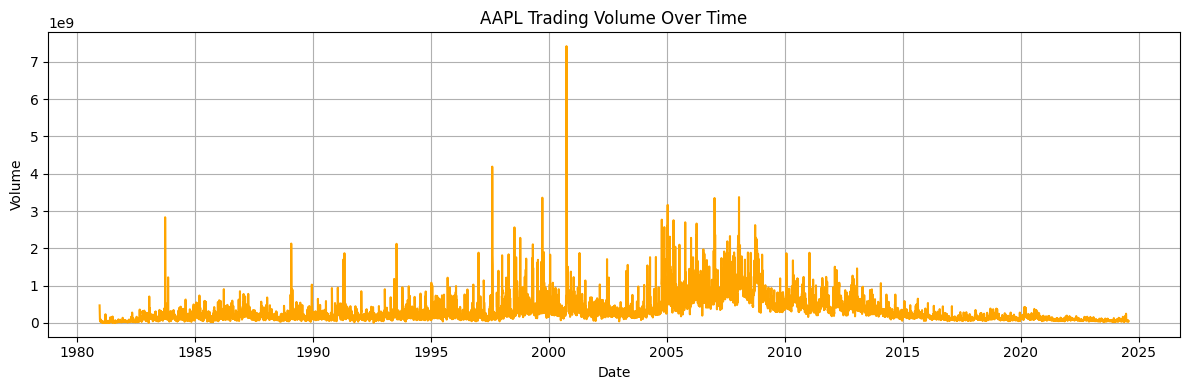

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()



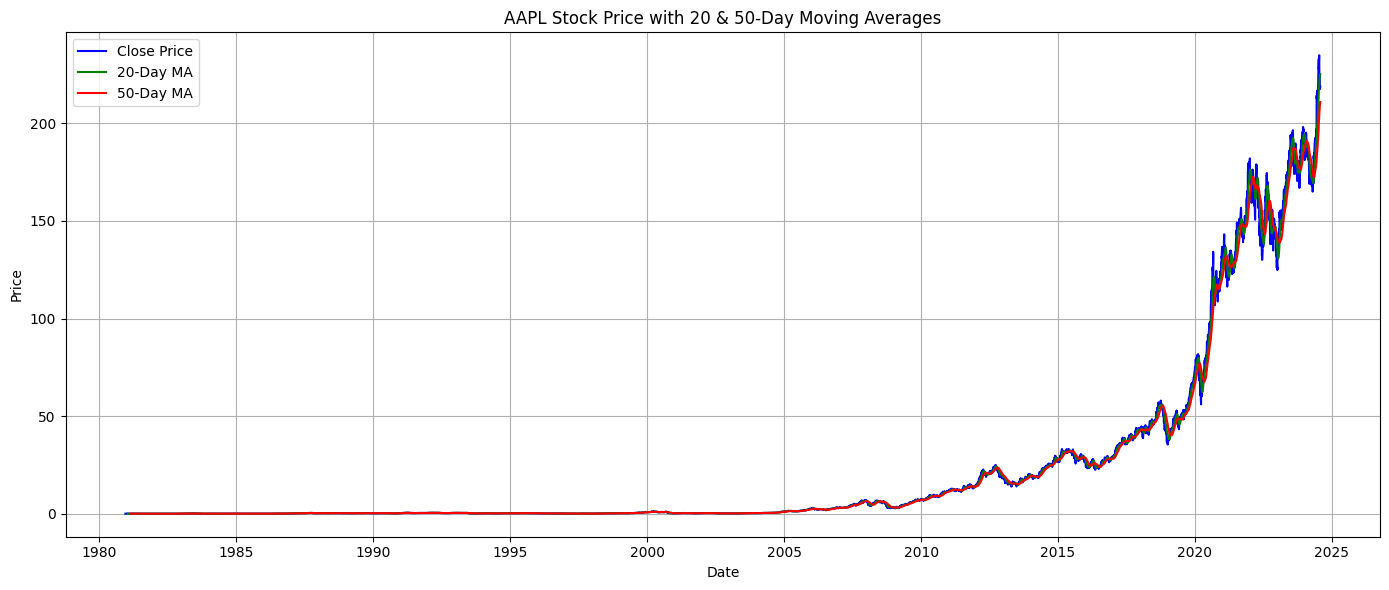

In [15]:
# 20-day Moving Average
df['MA_20'] = df['Close'].rolling(window=20).mean()

# 50-day Moving Average
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Plot Close price and Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_20'], label='20-Day MA', color='green')
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', color='red')
plt.title('AAPL Stock Price with 20 & 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


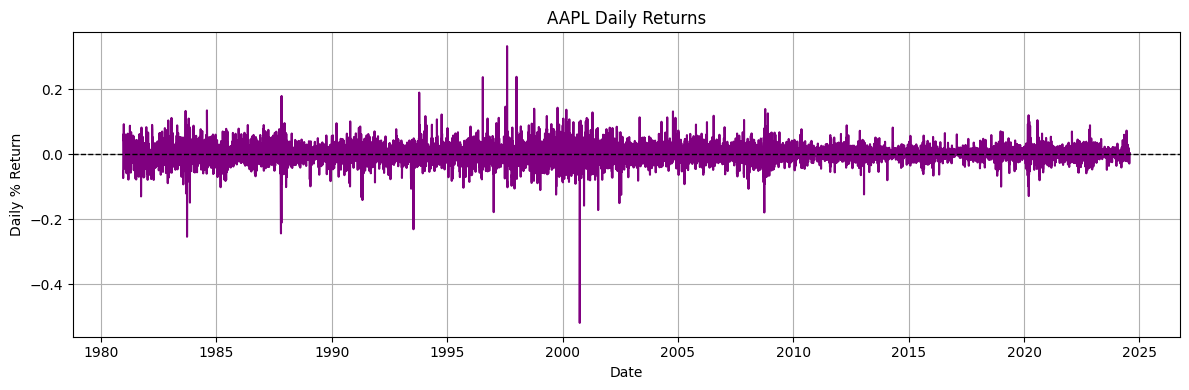

In [16]:
# Calculate daily percentage change
df['Daily Return'] = df['Close'].pct_change()

# Plot Daily Returns
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Daily Return'], label='Daily Return', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily % Return')
plt.grid(True)
plt.tight_layout()
plt.show()


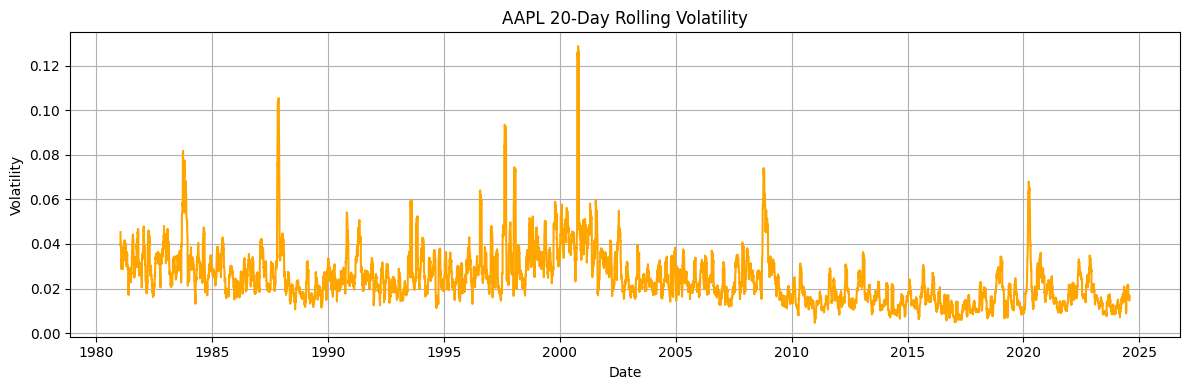

In [17]:
# 20-day rolling standard deviation (volatility)
df['Volatility_20'] = df['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volatility_20'], label='20-Day Volatility', color='orange')
plt.title('AAPL 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()


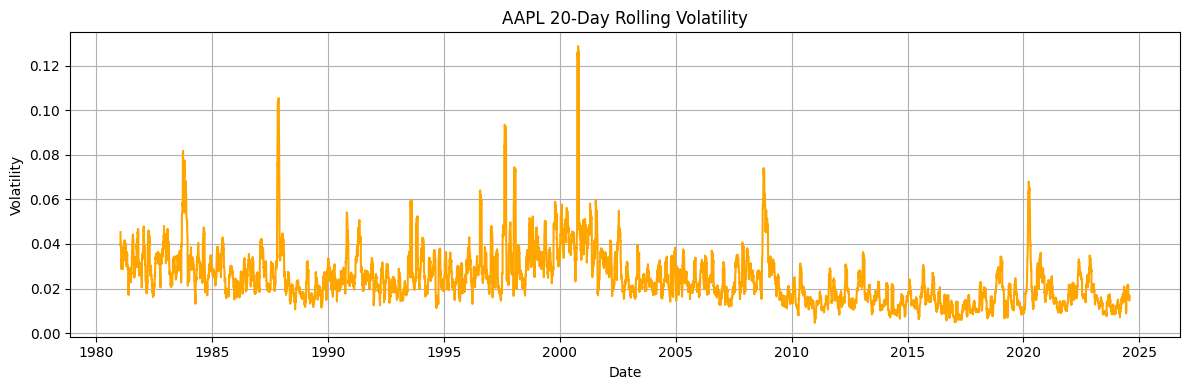

In [18]:
# 20-day rolling standard deviation (volatility)
df['Volatility_20'] = df['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volatility_20'], label='20-Day Volatility', color='orange')
plt.title('AAPL 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()
